In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,board_state,macroboard,current_player,valid_moves,chosen_move,game_result,agent_level,move_number,final_result
0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...",2,1,MCTS,0,1
1,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",-1,"18,19,20,21,22,23,24,25,26",26,1,Random,1,0
2,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"72,73,74,75,76,77,78,79,80",77,1,MCTS,2,1
3,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",-1,"45,46,47,48,49,50,51,52,53",50,1,Random,3,0
4,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"45,46,47,48,49,51,52,53",45,1,MCTS,4,1
...,...,...,...,...,...,...,...,...,...
17357,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,0,-1,0,-1...","-1,0,-1,-1,-1,0,0,1,1",-1,"15,17",17,-1,MCTS,47,1
17358,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,0,-1,-1,-...","-1,0,-1,-1,-1,0,0,1,1",1,"15,45,47,52,54,56,60,61,62",15,-1,Hard,48,0
17359,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,-1,-1,-...","-1,1,-1,-1,-1,0,0,1,1",-1,"54,56,60,61,62",62,-1,MCTS,49,1
17360,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,-1,-1,-...","-1,1,-1,-1,-1,0,0,1,1",1,"45,47,52,54,56,60,61",45,-1,Hard,50,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17362 entries, 0 to 17361
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   board_state     17362 non-null  object
 1   macroboard      17362 non-null  object
 2   current_player  17362 non-null  int64 
 3   valid_moves     17362 non-null  object
 4   chosen_move     17362 non-null  int64 
 5   game_result     17362 non-null  int64 
 6   agent_level     17362 non-null  object
 7   move_number     17362 non-null  int64 
 8   final_result    17362 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [4]:
train_df = train_df[train_df['agent_level'] != 'Random']

In [5]:
train_df = train_df[train_df['agent_level'] != 'Easy']

In [6]:
train_df

,board_state,macroboard,current_player,valid_moves,chosen_move,game_result,agent_level,move_number,final_result
0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...",2,1,MCTS,0,1
2,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"72,73,74,75,76,77,78,79,80",77,1,MCTS,2,1
4,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"45,46,47,48,49,51,52,53",45,1,MCTS,4,1
6,"0,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...","0,0,0,0,0,0,0,0,0",1,"36,37,38,39,40,41,42,43,44",42,1,MCTS,6,1
8,"0,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...","0,0,0,0,0,0,0,0,0",1,"46,47,48,49,51,52,53",48,1,MCTS,8,1
...,...,...,...,...,...,...,...,...,...
17357,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,0,-1,0,-1...","-1,0,-1,-1,-1,0,0,1,1",-1,"15,17",17,-1,MCTS,47,1
17358,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,0,-1,-1,-...","-1,0,-1,-1,-1,0,0,1,1",1,"15,45,47,52,54,56,60,61,62",15,-1,Hard,48,0
17359,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,-1,-1,-...","-1,1,-1,-1,-1,0,0,1,1",-1,"54,56,60,61,62",62,-1,MCTS,49,1
17360,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,-1,-1,-...","-1,1,-1,-1,-1,0,0,1,1",1,"45,47,52,54,56,60,61",45,-1,Hard,50,0


(array([3096.,    0.,    0.,    0.,    0.,    0., 3512.,    0.,    0.,
           0.,    0.,    0.,    0., 3837.,    0.,    0.,    0.,    0.,
           0., 1011.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

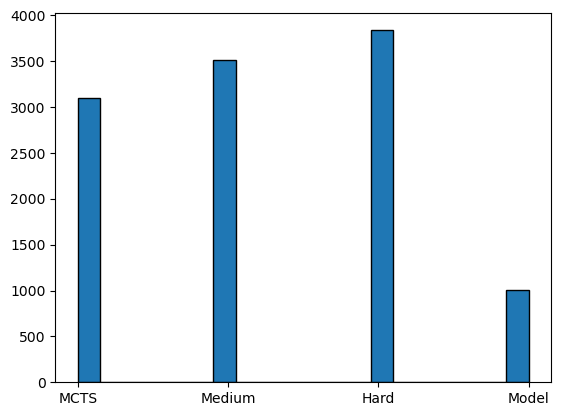

In [7]:
plt.hist(train_df['agent_level'], bins=20, edgecolor='black')


(array([820., 667., 705., 649., 661., 873., 562., 744., 598., 681., 316.,
        473., 520., 273., 593., 355., 459., 403., 565., 539.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.,
        52., 56., 60., 64., 68., 72., 76., 80.]),
 <BarContainer object of 20 artists>)

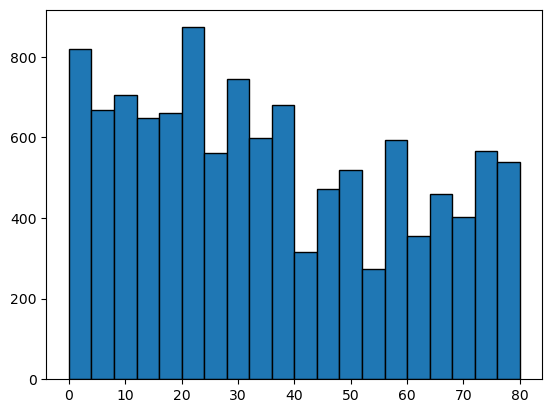

In [8]:
plt.hist(train_df['chosen_move'], bins=20, edgecolor='black')

(array([4736.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 6720.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

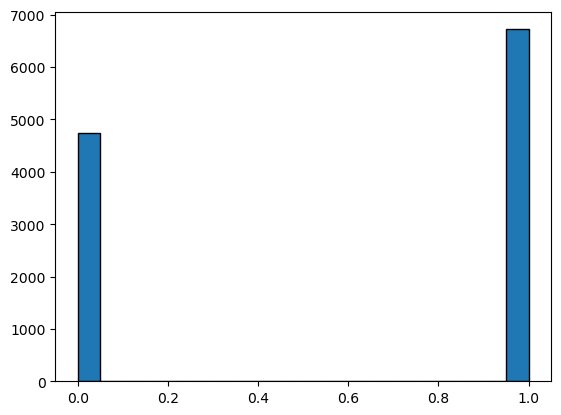

In [9]:
plt.hist(train_df['final_result'], bins=20, edgecolor='black')

## Preprocessing

In [10]:
# Ordinal encoding base on win rate
AGENT_LEVEL_WIN_RATE = {
    'Medium': 0.0,
    'Hard': 0.0,
    'MCTS': 0.0,
    'Model': 0.0
}
for level in AGENT_LEVEL_WIN_RATE.keys():
    wins = train_df[(train_df['agent_level'] == level) & (train_df['final_result'] == 1)].shape[0]
    total = train_df[train_df['agent_level'] == level].shape[0]
    AGENT_LEVEL_WIN_RATE[level] = wins / total if total > 0 else 0.0
print(AGENT_LEVEL_WIN_RATE)

{'Medium': 0.4783599088838269, 'Hard': 0.5676309616888194, 'MCTS': 0.832687338501292, 'Model': 0.2809099901088032}


In [11]:
# base on win rate, ordinal encoding
AGENT_LEVEL = {}
for i, level in enumerate(sorted(AGENT_LEVEL_WIN_RATE.keys(), key=lambda x: AGENT_LEVEL_WIN_RATE[x])):
    AGENT_LEVEL[level] = i
print(AGENT_LEVEL)

{'Model': 0, 'Medium': 1, 'Hard': 2, 'MCTS': 3}


In [12]:
# Ordinal encoding base on win rate
train_df['agent_level'] = train_df['agent_level'].map(lambda x: AGENT_LEVEL[x])
train_df

,board_state,macroboard,current_player,valid_moves,chosen_move,game_result,agent_level,move_number,final_result
0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...",2,1,3,0,1
2,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"72,73,74,75,76,77,78,79,80",77,1,3,2,1
4,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0",1,"45,46,47,48,49,51,52,53",45,1,3,4,1
6,"0,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...","0,0,0,0,0,0,0,0,0",1,"36,37,38,39,40,41,42,43,44",42,1,3,6,1
8,"0,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...","0,0,0,0,0,0,0,0,0",1,"46,47,48,49,51,52,53",48,1,3,8,1
...,...,...,...,...,...,...,...,...,...
17357,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,0,-1,0,-1...","-1,0,-1,-1,-1,0,0,1,1",-1,"15,17",17,-1,3,47,1
17358,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,0,-1,-1,-...","-1,0,-1,-1,-1,0,0,1,1",1,"15,45,47,52,54,56,60,61,62",15,-1,2,48,0
17359,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,-1,-1,-...","-1,1,-1,-1,-1,0,0,1,1",-1,"54,56,60,61,62",62,-1,3,49,1
17360,"1,-1,1,0,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,-1,-1,-...","-1,1,-1,-1,-1,0,0,1,1",1,"45,47,52,54,56,60,61",45,-1,2,50,0


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11456 entries, 0 to 17361
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   board_state     11456 non-null  object
 1   macroboard      11456 non-null  object
 2   current_player  11456 non-null  int64 
 3   valid_moves     11456 non-null  object
 4   chosen_move     11456 non-null  int64 
 5   game_result     11456 non-null  int64 
 6   agent_level     11456 non-null  int64 
 7   move_number     11456 non-null  int64 
 8   final_result    11456 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 895.0+ KB


In [14]:
# cascade str type 
train_df['board_state'] = train_df['board_state'].astype(str)
train_df['macroboard'] = train_df['macroboard'].astype(str)
train_df['valid_moves'] = train_df['valid_moves'].astype(str)

In [15]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11456 entries, 0 to 17361
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   board_state     11456 non-null  object
 1   macroboard      11456 non-null  object
 2   current_player  11456 non-null  int64 
 3   valid_moves     11456 non-null  object
 4   chosen_move     11456 non-null  int64 
 5   game_result     11456 non-null  int64 
 6   agent_level     11456 non-null  int64 
 7   move_number     11456 non-null  int64 
 8   final_result    11456 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 895.0+ KB


In [16]:
row = train_df.iloc[0]
row
    

board_state       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
macroboard                                        0,0,0,0,0,0,0,0,0
current_player                                                    1
valid_moves       0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...
chosen_move                                                       2
game_result                                                       1
agent_level                                                       3
move_number                                                       0
final_result                                                      1
Name: 0, dtype: object

In [17]:
import torch
def preprocess_full_record(row):
    # Channel 1: board state
    board = np.array(list(map(int, row['board_state'].split(',')))).reshape(9, 9)
    
    # Channel 2: macroboard (3x3 → broadcast)
    macro = np.array(list(map(int, row['macroboard'].split(',')))).reshape(3, 3)
    macro_full = np.repeat(np.repeat(macro, 3, axis=0), 3, axis=1)

    # Channel 3: current player
    player = np.full((9, 9), row['current_player'])

    # Channel 4: valid_moves
    valid = np.zeros((9, 9))
    valid_ids = list(map(int, row['valid_moves'].split(',')))
    for move_id in valid_ids:
        i, j = divmod(move_id, 9)
        valid[i][j] = 1

    # Stack all into (4, 9, 9)
    board_tensor = np.stack([board, macro_full, player, valid], axis=0).astype(np.float32)

    # MLP features
    move_number = row['move_number'] / 81.0  # Normalize
    agent_level = row['agent_level']
    game_result = row['game_result']

    mlp_features = np.array([move_number, agent_level, game_result], dtype=np.float32)

    # Label
    label = int(row['chosen_move'])
    
    # mask for valid moves
    mask = np.full(81, -np.inf, dtype = np.float32)
    mask[valid_ids] = 0.0

    # Final result (có thể là 0 hoặc 1, tùy vào dữ liệu của bạn)
    final_result = row['final_result']

    return torch.tensor(board_tensor), torch.tensor(mlp_features), torch.tensor(label), torch.tensor(mask), torch.tensor(final_result)


In [18]:
row = train_df.iloc[0]
board_tensor, mlp_features, label, mask, final_result = preprocess_full_record(row)

In [19]:
mask

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Prepare data for training and testing

In [20]:
def prepare_dataset(df):
    board_tensors = []
    mlp_features = []
    labels = []
    masks = []
    final_results = []
    for _, row in df.iterrows():
        board_tensor, mlp_feature, label, mask, final = preprocess_full_record(row)
        board_tensors.append(board_tensor)
        mlp_features.append(mlp_feature)
        labels.append(label)
        masks.append(mask)
        final_results.append(final)

    return torch.stack(board_tensors), torch.stack(mlp_features), torch.tensor(labels), torch.stack(masks), torch.tensor(final_results)


In [21]:
dataset = prepare_dataset(train_df)

In [22]:
class TicTacToeDataset(torch.utils.data.Dataset):
    def __init__(self, board_tensors, mlp_features, labels, masks, final_results):
        super(TicTacToeDataset, self).__init__()
        self.board_tensors = board_tensors
        self.mlp_features = mlp_features
        self.labels = labels
        self.masks = masks
        self.final_results = final_results

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.board_tensors[idx], self.mlp_features[idx], self.labels[idx], self.masks[idx], self.final_results[idx]

In [23]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.2


In [24]:
from sklearn.model_selection import train_test_split
train_size = int(len(dataset) * TRAIN_RATIO)

train_dataset = TicTacToeDataset(
    dataset[0][:train_size],
    dataset[1][:train_size],
    dataset[2][:train_size],
    dataset[3][:train_size],
    dataset[4][:train_size]
)
test_dataset = TicTacToeDataset(
    dataset[0][train_size:],
    dataset[1][train_size:],
    dataset[2][train_size:],
    dataset[3][train_size:],
    dataset[4][train_size:]
)

In [25]:
from torch.utils.data import DataLoader

In [26]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [27]:
next(iter(train_loader))[0].shape, next(iter(train_loader))[1].shape, next(iter(train_loader))[2].shape, next(iter(train_loader))[3].shape, next(iter(train_loader))[4].shape

(torch.Size([4, 4, 9, 9]),
 torch.Size([4, 3]),
 torch.Size([4]),
 torch.Size([4, 81]),
 torch.Size([4]))

In [28]:
import torch.nn as nn
import torch.nn.functional as F

class UltimateTicTacToeModel(nn.Module):
    def __init__(self):
        super(UltimateTicTacToeModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mlp = nn.Sequential(
            nn.Linear(3, 32),
            nn.ReLU()
        )
        self.combined = nn.Sequential(
            nn.Linear(32 * 81 + 32, 256),
            nn.ReLU()
        )
        
        self.output_moves = nn.Linear(256, 81)        
        self.output_result = nn.Linear(256, 2)        

    def forward(self, board_tensor, mlp_features):
        x1 = self.cnn(board_tensor)                   # (B, 32*81)
        x2 = self.fc_mlp(mlp_features)                # (B, 32)
        x = torch.cat([x1, x2], dim=1)                # (B, 32*81 + 32)
        x = self.combined(x)

        move_logits = self.output_moves(x)            # (B, 81)
        result_logits = self.output_result(x)         # (B, 2)
        return move_logits, result_logits



In [29]:
loss_fn = nn.CrossEntropyLoss()
model = UltimateTicTacToeModel()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_fn_move = nn.CrossEntropyLoss()
loss_fn_result = nn.CrossEntropyLoss()
alpha = 0.3  

def train(model, train_loader, optimizer, loss_fn_move, loss_fn_result, alpha):
    model.train()
    total_loss = 0.0
    for board_tensor, mlp_features, move_labels, valid_mask, result_labels in train_loader:
        board_tensor = board_tensor.to(device)
        mlp_features = mlp_features.to(device)
        move_labels = move_labels.to(device)
        valid_mask = valid_mask.to(device)
        result_labels = result_labels.to(device)  # phải là số nguyên 0 hoặc 1

        optimizer.zero_grad()
        output_moves, output_result = model(board_tensor, mlp_features)

        # Mask invalid moves
        masked_outputs = output_moves + valid_mask  # valid_mask: 0 (valid), -inf (invalid)

        loss_move = loss_fn_move(masked_outputs, move_labels)
        loss_result = loss_fn_result(output_result, result_labels)

        loss = loss_move + alpha * loss_result
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(model, test_loader):
    model.eval()
    correct_moves = 0
    total_moves = 0
    correct_results = 0
    total_results = 0

    with torch.no_grad():
        for board_tensor, mlp_features, move_labels, valid_mask, result_labels in test_loader:
            board_tensor = board_tensor.to(device)
            mlp_features = mlp_features.to(device)
            move_labels = move_labels.to(device)
            valid_mask = valid_mask.to(device)
            result_labels = result_labels.to(device)

            output_moves, output_result = model(board_tensor, mlp_features)

            masked_outputs = output_moves + (valid_mask * -1e9)
            _, predicted_moves = torch.max(masked_outputs, dim=1)
            correct_moves += (predicted_moves == move_labels).sum().item()
            total_moves += move_labels.size(0)
            
            _, predicted_results = torch.max(output_result, dim=1)
            correct_results += (predicted_results == result_labels).sum().item()
            total_results += result_labels.size(0)

    move_acc = correct_moves / total_moves if total_moves > 0 else 0
    result_acc = correct_results / total_results if total_results > 0 else 0
    return move_acc, result_acc

In [30]:
EPOCHS = 100

In [31]:
for epoch in range(EPOCHS):
    train_loss= train(model, train_loader, optimizer, loss_fn_move, loss_fn_result, alpha)
    move_acc, result_acc = evaluate(model, test_loader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {train_loss:.4f}, Move Acc: {move_acc:.4f}, Result Acc: {result_acc:.4f}")

Epoch 1/100, Loss: 2.9877, Move Acc: 0.0003, Result Acc: 0.4136
Epoch 2/100, Loss: 2.9034, Move Acc: 0.0024, Result Acc: 0.4143
Epoch 3/100, Loss: 2.8290, Move Acc: 0.0024, Result Acc: 0.4143
Epoch 4/100, Loss: 2.7617, Move Acc: 0.0024, Result Acc: 0.4377
Epoch 5/100, Loss: 2.6993, Move Acc: 0.0024, Result Acc: 0.5448
Epoch 6/100, Loss: 2.6420, Move Acc: 0.0024, Result Acc: 0.6263
Epoch 7/100, Loss: 2.5883, Move Acc: 0.0024, Result Acc: 0.6518
Epoch 8/100, Loss: 2.5353, Move Acc: 0.0024, Result Acc: 0.6629
Epoch 9/100, Loss: 2.4823, Move Acc: 0.0024, Result Acc: 0.6715
Epoch 10/100, Loss: 2.4291, Move Acc: 0.0024, Result Acc: 0.6830
Epoch 11/100, Loss: 2.3752, Move Acc: 0.0024, Result Acc: 0.6923
Epoch 12/100, Loss: 2.3208, Move Acc: 0.0024, Result Acc: 0.6998
Epoch 13/100, Loss: 2.2652, Move Acc: 0.0024, Result Acc: 0.7050
Epoch 14/100, Loss: 2.2086, Move Acc: 0.0024, Result Acc: 0.7103
Epoch 15/100, Loss: 2.1506, Move Acc: 0.0024, Result Acc: 0.7081
Epoch 16/100, Loss: 2.0916, Move A

In [32]:
import torch

# 1. Pick one row from your dataset
row = train_df.iloc[71]

# 2. Preprocess the row
board_tensor, mlp_features, label, mask, final_result = preprocess_full_record(row)

# 3. Move tensors to the appropriate device (e.g., 'cuda' or 'cpu')
board_tensor = board_tensor.unsqueeze(0).to(device)       # shape: (1, 4, 9, 9)
mlp_features = mlp_features.unsqueeze(0).to(device)       # shape: (1, 3)
mask = mask.unsqueeze(0).to(device)                       # shape: (1, 81)

print(board_tensor.shape, mlp_features.shape, label.shape, mask.shape)  
# 4. Set model to evaluation mode
model.eval()
print(mask)
# 5. Disable gradient computation
with torch.no_grad():
    # Get raw output logits
    output_moves, output_result = model(board_tensor, mlp_features)  # shape: (1, 81)
    
    masked_output = output_moves + mask   # shape: (1, 81)
    _, predicted_move = torch.max(masked_output, dim=1)  # shape: (1,)

# # 6. Print result
print(f"🎯 Predicted move: {predicted_move}, ✅ Actual move: {label.item()}")


torch.Size([1, 4, 9, 9]) torch.Size([1, 3]) torch.Size([]) torch.Size([1, 81])
tensor([[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 0.,
         0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]],
       device='cuda:0')
🎯 Predicted move: tensor([25], device='cuda:0'), ✅ Actual move: 23


In [33]:
# get the is_win
mlp_features.shape

torch.Size([1, 3])

In [34]:
mlp_features[0][2].item(), label.item(), row['game_result']

(1.0, 23, 1)

In [35]:
# log model
torch.save(model.state_dict(), 'model.pt')